In [1]:
import os, sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def load_df(textfile):
    df = pd.read_csv(textfile, sep=r'\s+', header=None)
    return df

def find_ranges(df, col):
    ranges = []
    lows = sorted(df[col[0]].unique())
    highs = sorted(df[col[1]].unique())
    for low, high in zip(lows, highs):
        ranges.append((low, high))
    return ranges

def calculate_errors(ranges, truncate=None):
    midpoints = []
    xerr_low  = []
    xerr_high = []
    for (xlow, xhigh) in ranges:
        if xhigh > truncate: xhigh=truncate
        if xlow >= truncate: print(f"Can't truncate {xhigh} to {truncate}")
        xmid = (xlow + xhigh)/2
        midpoints.append(xmid)
        xerr_low.append(xmid - xlow)
        xerr_high.append(xhigh - xmid)
    
    return midpoints, xerr_low, xerr_high

print('Functions loaded.')

Functions loaded.


In [3]:
df_ele_id  = load_df('SFfromPOG/electron_id_sf.txt')
df_muon_id  = load_df('SFfromPOG/muon_id_sf.txt')
df_muon_iso = load_df('SFfromPOG/muon_iso_sf.txt')
display(df_ele_id)
print('Dataframes loaded.')

,0,1,2,3,4,5,6,7
0,2016postVFP_UL,-2.5,-2.0,10.0,20.0,1.024601,1.039711,1.054822
1,2016postVFP_UL,-2.5,-2.0,20.0,35.0,0.999609,1.015896,1.032183
2,2016postVFP_UL,-2.5,-2.0,35.0,50.0,1.004619,1.008838,1.013057
3,2016postVFP_UL,-2.5,-2.0,50.0,100.0,0.998897,1.003614,1.008332
4,2016postVFP_UL,-2.5,-2.0,100.0,1500.0,1.004960,1.027088,1.049216
...,...,...,...,...,...,...,...,...
215,2018_UL,2.0,2.5,20.0,35.0,0.973622,0.988685,1.003747
216,2018_UL,2.0,2.5,35.0,50.0,0.981954,0.985258,0.988562
217,2018_UL,2.0,2.5,50.0,100.0,0.975857,0.980117,0.984377
218,2018_UL,2.0,2.5,100.0,200.0,0.972655,0.985459,0.998263


Dataframes loaded.


In [4]:
def plot_lepton_sf(df, plotname):
    eta_ranges = find_ranges(df, [1, 2])
    for (eta_min, eta_max) in eta_ranges:
        df_eta_range = df[(df[1] >= eta_min) & (df[2] <= eta_max)]
        grouped_by_campaign = df_eta_range.groupby(0)
        
        plt.figure(figsize=(8, 3))

        for campaign, group in grouped_by_campaign:
            pt_ranges = find_ranges(group, [3, 4])

            # Calculate pt midpoints and errors using the function
            pt_midpoints, pt_xlow_errors, pt_xhigh_errors = calculate_errors(pt_ranges, truncate=300)

            sf_values = group[6].values
            sf_up_values = group[7].values
            sf_down_values = group[5].values

            # Ensure that the lengths match
            if len(sf_values) != len(pt_midpoints):
                print(f"Error: Length mismatch between sf_values and pt_midpoints for campaign {campaign}")
                continue  # Skip if there's a mismatch

            # Calculate y-errors (based on up and down values)
            yerr_up = sf_up_values - sf_values
            yerr_down = sf_values - sf_down_values

            # Plot the results
            plt.errorbar(pt_midpoints, sf_values,
                         yerr=[yerr_down, yerr_up],
                         xerr=[pt_xlow_errors, pt_xhigh_errors],
                         label=f"{campaign}", fmt='o', capsize=3)

        # Decorations:
        plt.xlabel(r"$p_T$ (GeV)", fontsize=14)
        plt.ylabel(plotname, fontsize=14)
        plt.ylim(0.80, 1.4)
        #plt.title(rf"{plotname}", fontsize=16)
        legendheader = fr"{eta_min} < $|\eta|$ < {eta_max}"
        plt.legend(loc='upper right', fontsize=10, ncol=2)
        plt.axhline(y=1, color='k', linestyle='--', linewidth=1)
        plt.text(0.02, 0.82, 'CMS', fontsize=22, fontweight='bold', family='sans-serif', 
         transform=plt.gca().transAxes, bbox=dict(facecolor='white', edgecolor='white', boxstyle='round,pad=0.3'))
        plt.text(0.02, 0.72, legendheader, fontsize=12, family='sans-serif', 
         transform=plt.gca().transAxes, bbox=dict(facecolor='white', edgecolor='white', boxstyle='round,pad=0.3'))



        plotdir = os.path.join('plots', plotname.replace(' ', '_'))
        figname = plotname.replace(' ', '_')+str(eta_min)+'_'+str(eta_max)+'.png'
        fullfigname = os.path.join(plotdir, figname)
        os.makedirs(plotdir, exist_ok=True)
        plt.savefig(fullfigname, dpi=75)
        print(fullfigname+" created.")
        plt.show()

        #break  # Break out of eta-range loop (if needed for debugging)

plots/Electron_ID_SF/Electron_ID_SF-2.5_-2.0.png created.


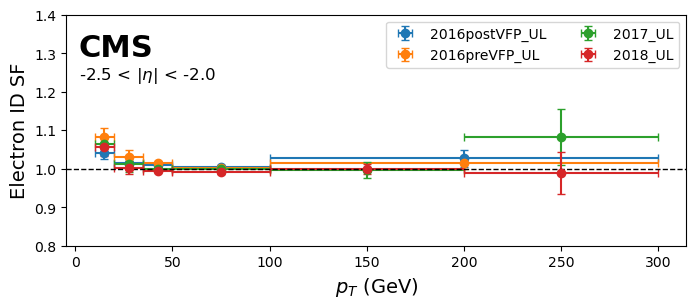

plots/Electron_ID_SF/Electron_ID_SF-2.0_-1.566.png created.


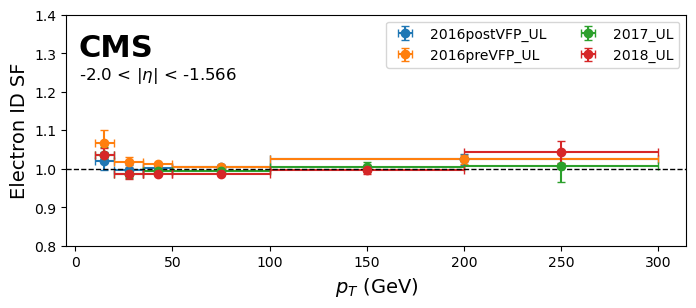

plots/Electron_ID_SF/Electron_ID_SF-1.566_-1.444.png created.


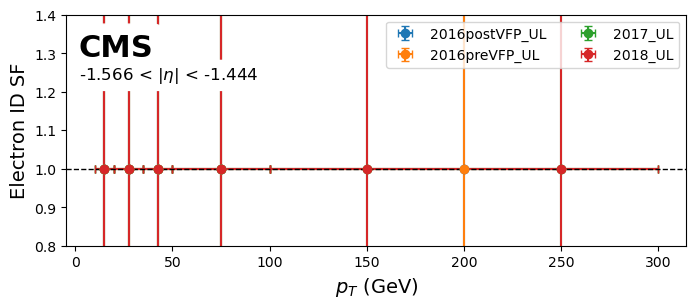

plots/Electron_ID_SF/Electron_ID_SF-1.444_-0.8.png created.


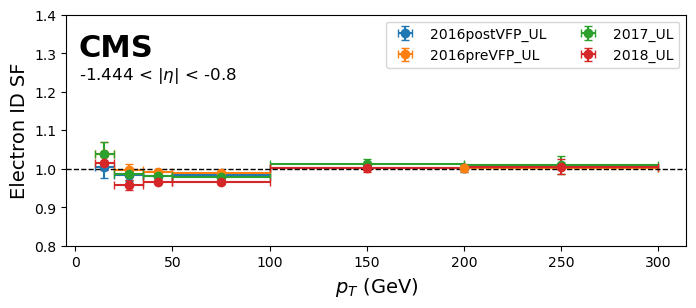

plots/Electron_ID_SF/Electron_ID_SF-0.8_0.0.png created.


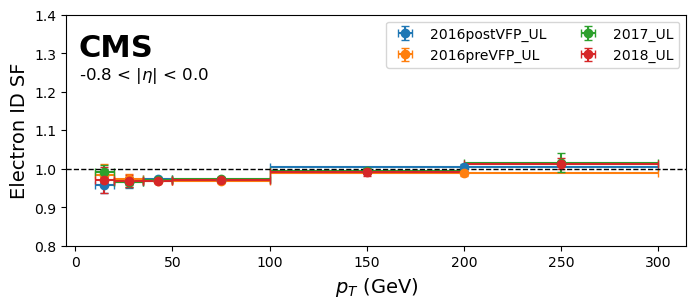

plots/Electron_ID_SF/Electron_ID_SF0.0_0.8.png created.


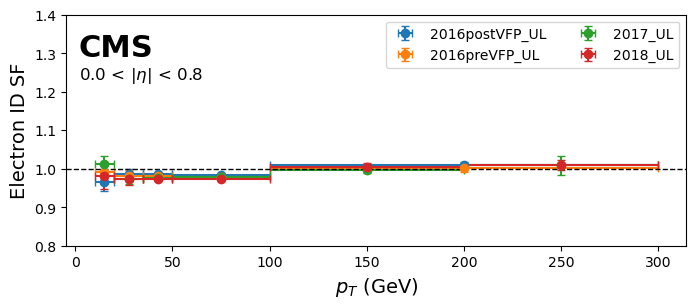

plots/Electron_ID_SF/Electron_ID_SF0.8_1.444.png created.


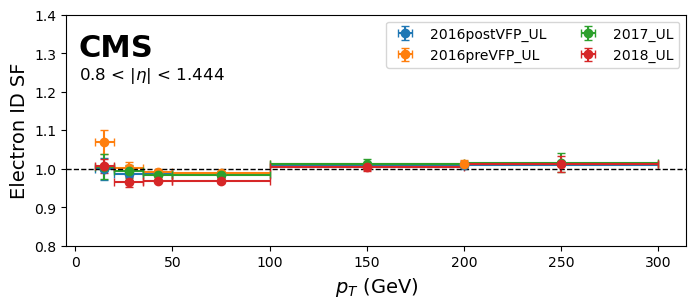

plots/Electron_ID_SF/Electron_ID_SF1.444_1.566.png created.


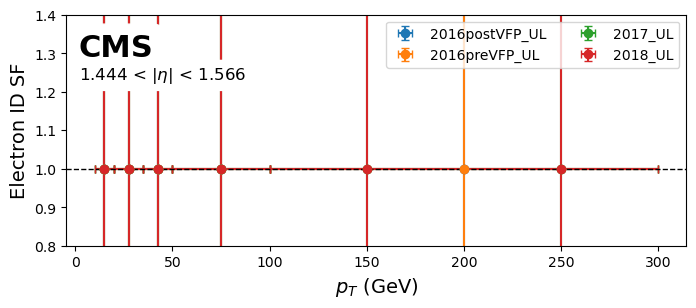

plots/Electron_ID_SF/Electron_ID_SF1.566_2.0.png created.


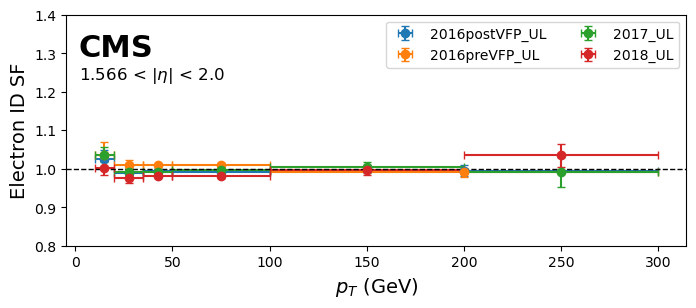

plots/Electron_ID_SF/Electron_ID_SF2.0_2.5.png created.


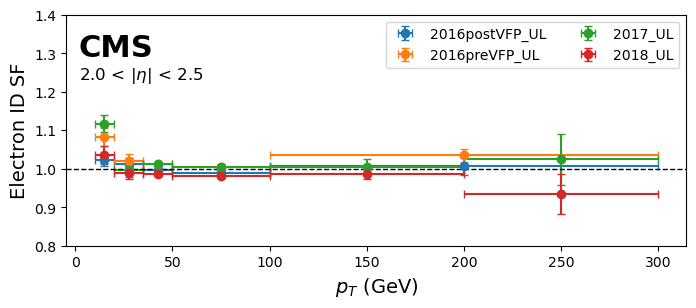

In [5]:
plot_lepton_sf(df_ele_id, "Electron ID SF")

plots/Muon_ID_SF/Muon_ID_SF0.0_0.9.png created.


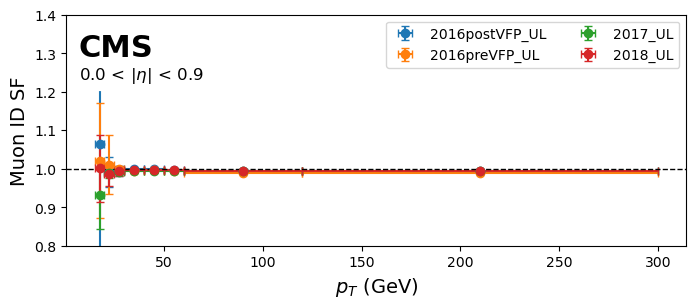

plots/Muon_ID_SF/Muon_ID_SF0.9_1.2.png created.


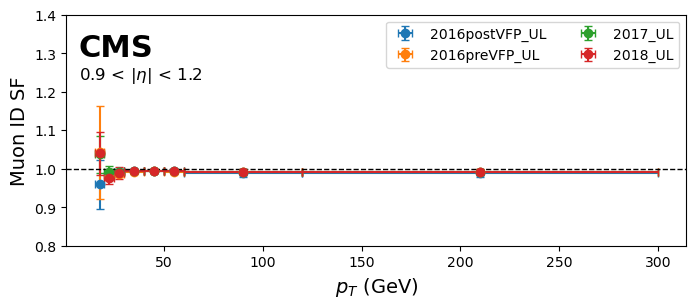

plots/Muon_ID_SF/Muon_ID_SF1.2_2.1.png created.


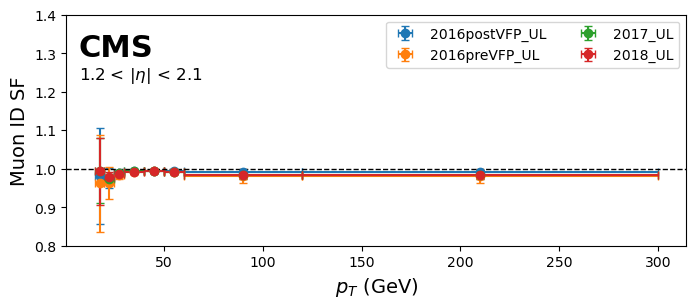

plots/Muon_ID_SF/Muon_ID_SF2.1_2.4.png created.


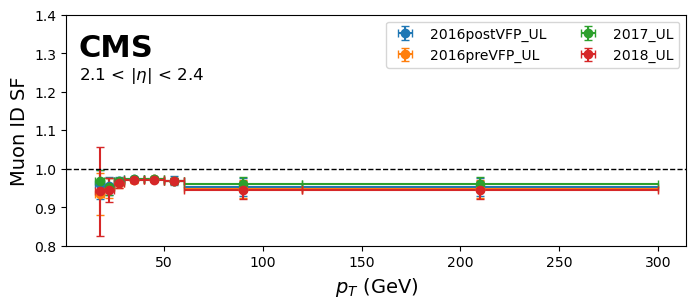

In [6]:
plot_lepton_sf(df_muon_id, "Muon ID SF")

plots/Muon_Iso_SF/Muon_Iso_SF0.0_0.9.png created.


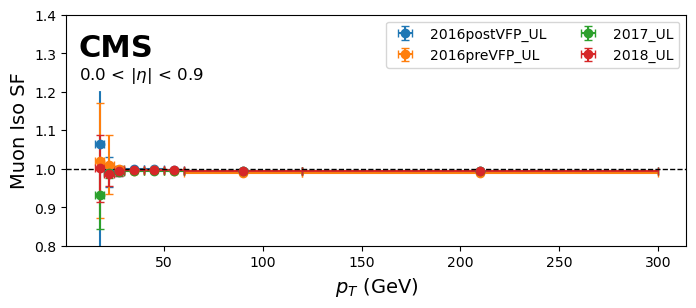

plots/Muon_Iso_SF/Muon_Iso_SF0.9_1.2.png created.


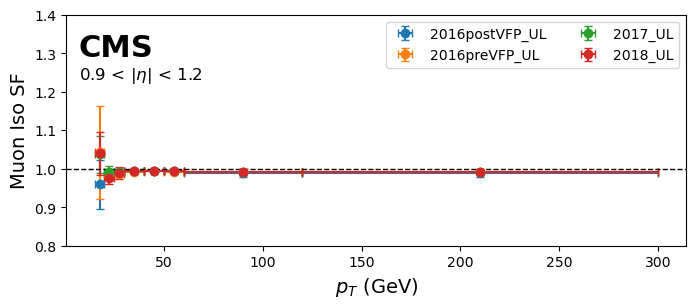

plots/Muon_Iso_SF/Muon_Iso_SF1.2_2.1.png created.


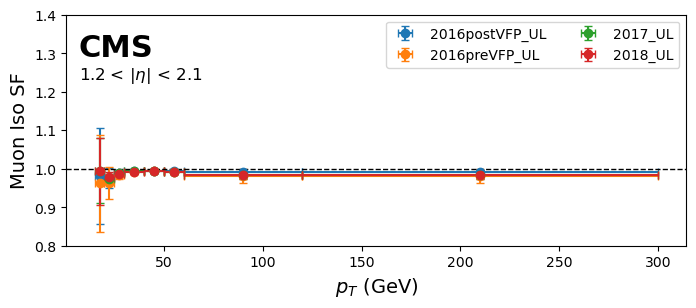

plots/Muon_Iso_SF/Muon_Iso_SF2.1_2.4.png created.


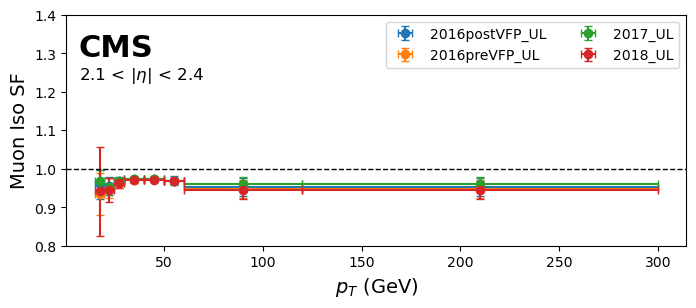

In [7]:
plot_lepton_sf(df_muon_id, "Muon Iso SF")